In [1]:
from __future__ import print_function, division

import nsfg

In [2]:
preg = nsfg.ReadFemPreg()
print(preg.head())

   caseid  pregordr  howpreg_n  howpreg_p  moscurrp  nowprgdk  pregend1  \
0       1         1        NaN        NaN       NaN       NaN       6.0   
1       1         2        NaN        NaN       NaN       NaN       6.0   
2       2         1        NaN        NaN       NaN       NaN       5.0   
3       2         2        NaN        NaN       NaN       NaN       6.0   
4       2         3        NaN        NaN       NaN       NaN       6.0   

   pregend2  nbrnaliv  multbrth  ...  laborfor_i  religion_i  metro_i  \
0       NaN       1.0       NaN  ...           0           0        0   
1       NaN       1.0       NaN  ...           0           0        0   
2       NaN       3.0       5.0  ...           0           0        0   
3       NaN       1.0       NaN  ...           0           0        0   
4       NaN       1.0       NaN  ...           0           0        0   

       basewgt  adj_mod_basewgt      finalwgt  secu_p  sest  cmintvw  \
0  3410.389399      3869.349602   6448

In [3]:
preg.columns

Index(['caseid', 'pregordr', 'howpreg_n', 'howpreg_p', 'moscurrp', 'nowprgdk',
       'pregend1', 'pregend2', 'nbrnaliv', 'multbrth',
       ...
       'laborfor_i', 'religion_i', 'metro_i', 'basewgt', 'adj_mod_basewgt',
       'finalwgt', 'secu_p', 'sest', 'cmintvw', 'totalwgt_lb'],
      dtype='object', length=244)

In [4]:
type(preg['pregordr'])

pandas.core.series.Series

In [5]:
preg['pregordr']

0        1
1        2
2        1
3        2
4        3
        ..
13588    1
13589    2
13590    3
13591    4
13592    5
Name: pregordr, Length: 13593, dtype: int64

In [6]:
preg['finalwgt']

0         6448.271112
1         6448.271112
2        12999.542264
3        12999.542264
4        12999.542264
             ...     
13588     6269.200989
13589     6269.200989
13590     6269.200989
13591     6269.200989
13592     6269.200989
Name: finalwgt, Length: 13593, dtype: float64

In [7]:
preg['birthwgt_oz'].value_counts()

0.0     1037
8.0      756
6.0      709
2.0      603
11.0     557
12.0     555
5.0      535
3.0      533
4.0      525
9.0      505
7.0      501
13.0     487
10.0     475
14.0     475
1.0      408
15.0     378
Name: birthwgt_oz, dtype: int64

In [8]:
%config IPCompleter.greedy=True

In [9]:
preg['totalwgt_lb']

0        8.8125
1        7.8750
2        9.1250
3        7.0000
4        6.1875
          ...  
13588    6.1875
13589       NaN
13590       NaN
13591    7.5000
13592    7.5000
Name: totalwgt_lb, Length: 13593, dtype: float64

In [10]:
preg['outcome'].value_counts().sort_index()

1    9148
2    1862
3     120
4    1921
5     190
6     352
Name: outcome, dtype: int64

In [11]:
preg['birthwgt_lb'].value_counts().sort_index()

0.0        8
1.0       40
2.0       53
3.0       98
4.0      229
5.0      697
6.0     2223
7.0     3049
8.0     1889
9.0      623
10.0     132
11.0      26
12.0      10
13.0       3
14.0       3
15.0       1
Name: birthwgt_lb, dtype: int64

In [12]:
"""
value	label	 	        Total
1	LIVE BIRTH              9148
2	INDUCED ABORTION        1862
3	STILLBIRTH               120
4	MISCARRIAGE             1921
5	ECTOPIC PREGNANCY        190
6	CURRENT PREGNANCY        352
"""

'\nvalue\tlabel\t \t        Total\n1\tLIVE BIRTH              9148\n2\tINDUCED ABORTION        1862\n3\tSTILLBIRTH               120\n4\tMISCARRIAGE             1921\n5\tECTOPIC PREGNANCY        190\n6\tCURRENT PREGNANCY        352\n'

In [13]:
preg_map = nsfg.MakePregMap(preg)
preg_map[10229]

[11093, 11094, 11095, 11096, 11097, 11098, 11099]

In [14]:
preg.outcome[preg_map[10229]].values

array([4, 4, 4, 4, 4, 4, 1], dtype=int64)

In [15]:
import thinkstats2
hist = thinkstats2.Hist([1,2,2,2,3,5])
hist

Hist({1: 1, 2: 3, 3: 1, 5: 1})

In [16]:
hist.Freq(2)

3

In [17]:
list(hist.Values())

[1, 2, 3, 5]

In [18]:
hist.Items()

dict_items([(1, 1), (2, 3), (3, 1), (5, 1)])

In [19]:
list(hist.Items())

[(1, 1), (2, 3), (3, 1), (5, 1)]

In [20]:
# Live Births:
live = preg[preg['outcome']==1]

In [21]:
import numpy as np
np.max(live.totalwgt_lb)

15.4375

In [22]:
bins = np.linspace(np.min(live.totalwgt_lb), np.max(live.totalwgt_lb),10)
bins

array([ 0.125     ,  1.82638889,  3.52777778,  5.22916667,  6.93055556,
        8.63194444, 10.33333333, 12.03472222, 13.73611111, 15.4375    ])

C:\Users\ARINDAM\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\ARINDAM\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


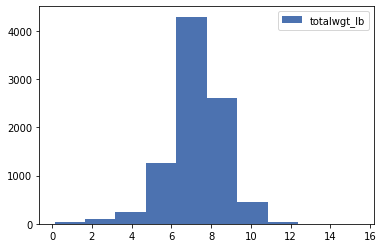

In [23]:
import matplotlib.pyplot as plt

#range = np.min(live.totalwgt_lb) - np.max(live.totalwgt_lb)
plt.style.use('seaborn-deep')

plt.hist(live.totalwgt_lb, bins=10, label='totalwgt_lb')
plt.legend(loc='upper right')
plt.show()

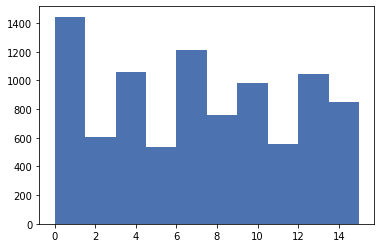

In [24]:
plt.hist(live.birthwgt_oz)
plt.show()

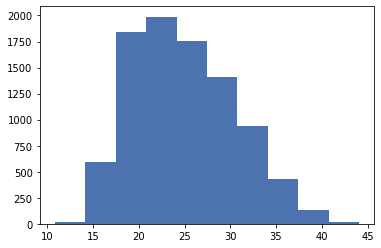

In [25]:
plt.hist(live.agepreg) # Age of mothers at the end of pregnancy
plt.show()

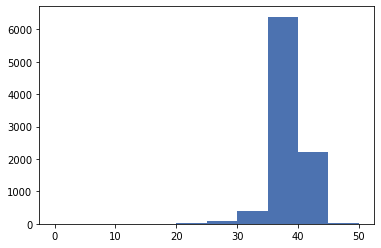

In [26]:
plt.hist(live.prglngth) # Length of pregnancy in weeks
plt.show()

In [27]:
live.prglngth.value_counts().sort_index()

0        1
4        1
9        1
13       1
17       2
18       1
19       1
20       1
21       2
22       7
23       1
24      13
25       3
26      35
27       3
28      32
29      21
30     138
31      27
32     115
33      49
34      60
35     311
36     321
37     455
38     607
39    4693
40    1116
41     587
42     328
43     148
44      46
45      10
46       1
47       1
48       7
50       2
Name: prglngth, dtype: int64

In [28]:
prglngth_hist = thinkstats2.Hist(live.prglngth)
for w,i in prglngth_hist.Smallest(10):
    print(w,i)

0 1
4 1
9 1
13 1
17 2
18 1
19 1
20 1
21 2
22 7


In [29]:
for w,i in prglngth_hist.Largest(10):
    print(w,i)

50 2
48 7
47 1
46 1
45 10
44 46
43 148
42 328
41 587
40 1116


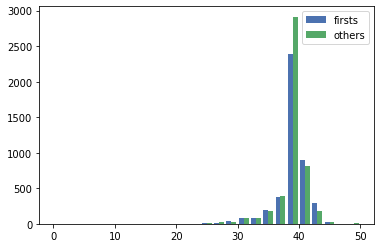

In [30]:
firsts = live[live.birthord==1]
others = live[live.birthord!=1]

plt.hist([firsts.prglngth, others.prglngth], bins=25, label=['firsts', 'others'])
plt.legend(loc='upper right')
plt.show()


In [31]:
mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()
print(mean,std)

38.56055968517709 2.702343810070587


In [32]:
"""
For all live births, the mean pregnancy length is 38.6 weeks, the standard deviation is 2.7 weeks, 
which means we should expect deviations of 2-3 weeks to be common.
"""

'\nFor all live births, the mean pregnancy length is 38.6 weeks, the standard deviation is 2.7 weeks, \nwhich means we should expect deviations of 2-3 weeks to be common.\n'

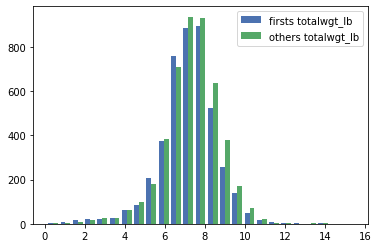

In [33]:
plt.hist([firsts.totalwgt_lb, others.totalwgt_lb], bins=25, label=['firsts totalwgt_lb', 'others totalwgt_lb'])
plt.legend(loc='upper right')
plt.show()

In [34]:
import math
def CohenEffectSize(group1, group2):
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / math.sqrt(pooled_var)
    return d

In [35]:
# First Baby prglngth
CohenEffectSize(firsts.prglngth,others.prglngth)

0.028879044654449834

In [36]:
# First Baby totalwgt_lb
CohenEffectSize(firsts.totalwgt_lb,others.totalwgt_lb)

-0.08867292707260174

In [37]:
def pmf(seq):
    #unique_vals = set(seq)
    freq_dict = {}
    for i in seq:
        if i in freq_dict:
            freq_dict[i]+=1
        else:
            freq_dict[i] = 1
    N = len(seq)
    pmf_dict = {}
    for k,v in freq_dict.items():
        pmf_dict[k] = v/N
    return pmf_dict

pmf([1, 2, 2, 3, 5])

{1: 0.2, 2: 0.4, 3: 0.2, 5: 0.2}

In [38]:
pmf_firsts_prglngth = pmf(firsts.prglngth)
pmf_others_prglngth = pmf(others.prglngth)
pmf_firsts_prglngth

{39: 0.47903920235667347,
 38: 0.0616360752322683,
 33: 0.0063448900974393836,
 41: 0.08157715839564922,
 42: 0.04645365964196692,
 36: 0.03897575345569907,
 40: 0.12145932472241106,
 37: 0.04713346929526399,
 35: 0.03602991162474507,
 43: 0.01971447994561523,
 32: 0.012463176977113076,
 24: 0.0015862225243598459,
 44: 0.005211874008610922,
 30: 0.016542034896895538,
 28: 0.005438477226376614,
 31: 0.003399048266485384,
 34: 0.006571493315205076,
 26: 0.0036256514842510764,
 20: 0.00022660321776569228,
 48: 0.0006798096532970768,
 29: 0.0020394289598912306,
 45: 0.0013596193065941536,
 27: 0.00022660321776569228,
 0: 0.00022660321776569228,
 21: 0.00022660321776569228,
 17: 0.00022660321776569228,
 25: 0.00022660321776569228,
 22: 0.0006798096532970768,
 47: 0.00022660321776569228,
 23: 0.00022660321776569228,
 46: 0.00022660321776569228}

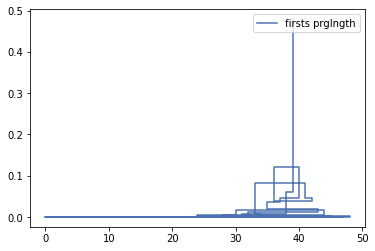

In [39]:
plt.step(list(pmf_firsts_prglngth.keys()),
         list(pmf_firsts_prglngth.values()), 
         label='firsts prglngth')
plt.legend(loc='upper right')
plt.show()

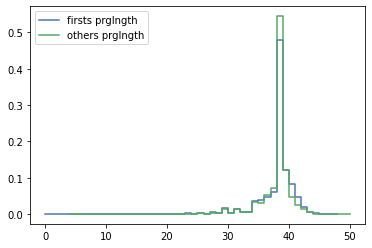

In [40]:
from collections import OrderedDict

sorted_pmf_firsts_prglngth = OrderedDict(sorted(pmf_firsts_prglngth.items()))
sorted_pmf_others_prglngth = OrderedDict(sorted(pmf_others_prglngth.items()))

plt.step(list(sorted_pmf_firsts_prglngth.keys()),
         list(sorted_pmf_firsts_prglngth.values()), 
         label='firsts prglngth')
plt.step(list(sorted_pmf_others_prglngth.keys()),
         list(sorted_pmf_others_prglngth.values()), 
         label='others prglngth')
plt.legend(loc='upper left')
plt.show()

In [41]:
def EvalCdf(t, x):
    count = 0.0
    for value in t:
        if value <= x:
            count += 1

    prob = count / len(t)
    return prob

In [42]:
cdf = {}
nums = set(live.prglngth)
nums

{0,
 4,
 9,
 13,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 50}

In [43]:
for i in nums:
    cdf[i] = EvalCdf(live.prglngth,i)
cdf

{0: 0.00010931351114997814,
 4: 0.00021862702229995628,
 9: 0.00032794053344993443,
 13: 0.00043725404459991256,
 17: 0.0006558810668998689,
 18: 0.000765194578049847,
 19: 0.0008745080891998251,
 20: 0.0009838216003498032,
 21: 0.0012024486226497595,
 22: 0.0019676432006996065,
 23: 0.0020769567118495845,
 24: 0.0034980323567993005,
 25: 0.003825972890249235,
 26: 0.00765194578049847,
 27: 0.007979886313948404,
 28: 0.011477918670747704,
 29: 0.013773502404897246,
 30: 0.028858766943594228,
 31: 0.03181023174464364,
 32: 0.04438128552689112,
 33: 0.049737647573240056,
 34: 0.056296458242238744,
 35: 0.09029296020988194,
 36: 0.12538259728902493,
 37: 0.17512024486226496,
 38: 0.2414735461303017,
 39: 0.7544818539571491,
 40: 0.8764757324005247,
 41: 0.9406427634455619,
 42: 0.9764975951027547,
 43: 0.9926759947529514,
 44: 0.9977044162658505,
 45: 0.9987975513773503,
 46: 0.9989068648885002,
 47: 0.9990161783996502,
 48: 0.9997813729777001,
 50: 1.0}

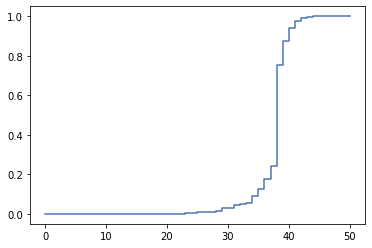

In [44]:
plt.step(list(cdf.keys()), list(cdf.values()))
plt.show()

In [45]:
import pandas as pd
var_info = [
    ('time', 1, 8, int),
    ('sex', 9, 16, int),
    ('weight_g', 17, 24, int),
    ('minutes', 25, 32, int),
    ]
columns = ['name', 'start', 'end', 'type']
variables = pd.DataFrame(var_info, columns=columns)
variables

,name,start,end,type
0,time,1,8,<class 'int'>
1,sex,9,16,<class 'int'>
2,weight_g,17,24,<class 'int'>
3,minutes,25,32,<class 'int'>


In [46]:
variables.end += 1
variables

,name,start,end,type
0,time,1,9,<class 'int'>
1,sex,9,17,<class 'int'>
2,weight_g,17,25,<class 'int'>
3,minutes,25,33,<class 'int'>


In [47]:
dct = thinkstats2.FixedWidthVariables(variables, index_base=1)

babyboom = dct.ReadFixedWidth('babyboom.dat', skiprows=59)

babyboom.head()

,time,sex,weight_g,minutes
0,5,1,3837,5
1,104,1,3334,64
2,118,2,3554,78
3,155,2,3838,115
4,257,2,3625,177


In [48]:
diffs = babyboom.minutes.diff()
diffs

0       NaN
1      59.0
2      14.0
3      37.0
4      62.0
5      68.0
6       2.0
7      15.0
8       9.0
9     157.0
10     27.0
11     37.0
12      2.0
13     55.0
14     86.0
15     14.0
16      4.0
17     40.0
18     36.0
19     47.0
20      9.0
21     61.0
22      1.0
23     26.0
24     13.0
25     28.0
26     77.0
27     26.0
28     45.0
29     25.0
30     18.0
31     29.0
32     15.0
33     38.0
34      2.0
35      2.0
36     19.0
37     27.0
38     14.0
39     13.0
40     19.0
41     54.0
42     70.0
43     28.0
Name: minutes, dtype: float64

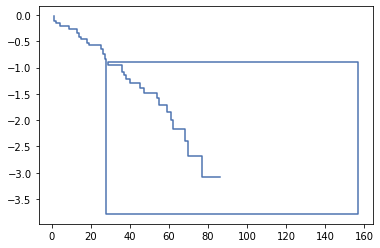

In [49]:
import math
ccdf = {}
nums = set(diffs)
for i in nums:
    ccdf[i] = 1 - EvalCdf(diffs,i)
plt.step(list(ccdf.keys()), [math.log(x) for x in ccdf.values()])
plt.show()

In [50]:
import thinkplot

def MakeNormalPlot(weights):
    mean = weights.mean()
    std = weights.std()

    xs = [-4, 4]
    fxs, fys = thinkstats2.FitLine(xs, inter=mean, slope=std)
    thinkplot.Plot(fxs, fys, color='gray', label='model')

    xs, ys = thinkstats2.NormalProbability(weights)
    thinkplot.Plot(xs, ys, label='birth weights')

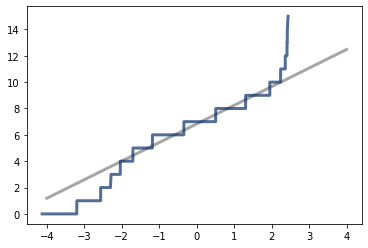

In [51]:
MakeNormalPlot(live.birthwgt_lb)

In [52]:
def CleanBrfssFrame(df):
    """Recodes BRFSS variables.
    df: DataFrame
    """
    # clean age
    df.age.replace([7, 9], float('NaN'), inplace=True)

    # clean height
    df.htm3.replace([999], float('NaN'), inplace=True)

    # clean weight
    df.wtkg2.replace([99999], float('NaN'), inplace=True)
    df.wtkg2 /= 100.0

    # clean weight a year ago
    df.wtyrago.replace([7777, 9999], float('NaN'), inplace=True)
    df['wtyrago'] = df.wtyrago.apply(lambda x: x/2.2 if x < 9000 else x-9000)

In [53]:
def ReadBrfss(filename='CDBRFS08.ASC.gz', compression='gzip', nrows=None):
    """Reads the BRFSS data.
    filename: string
    compression: string
    nrows: int number of rows to read, or None for all
    returns: DataFrame
    """
    var_info = [
        ('age', 101, 102, int),
        ('sex', 143, 143, int),
        ('wtyrago', 127, 130, int),
        ('finalwt', 799, 808, int),
        ('wtkg2', 1254, 1258, int),
        ('htm3', 1251, 1253, int),
        ]
    columns = ['name', 'start', 'end', 'type']
    variables = pd.DataFrame(var_info, columns=columns)
    variables.end += 1
    dct = thinkstats2.FixedWidthVariables(variables, index_base=1)

    df = dct.ReadFixedWidth(filename, compression=compression, nrows=nrows)
    CleanBrfssFrame(df)
    return df

In [54]:
brfss = ReadBrfss()
brfss.head()

,age,sex,wtyrago,finalwt,wtkg2,htm3
0,82.0,2,76.363636,185.870345,70.91,157.0
1,65.0,2,72.727273,126.603027,72.73,163.0
2,48.0,2,NaN,181.063210,NaN,165.0
3,61.0,1,73.636364,517.926275,73.64,170.0
4,26.0,1,88.636364,1252.624630,88.64,185.0


In [55]:
mean, var = 163, 52.8
std = math.sqrt(var)

In [56]:
import scipy

scipy.stats.norm.pdf(mean+std, mean, std)

0.033300124989618714

In [57]:
brfss.wtkg2.dropna()

0          70.91
1          72.73
3          73.64
4          88.64
5         109.09
           ...  
414504     88.64
414505     72.73
414506     90.91
414507     89.09
414508     75.00
Name: wtkg2, Length: 398484, dtype: float64

In [58]:
"""kde = scipy.stats.gaussian_kde(brfss.wtkg2.dropna())
x = brfss.wtkg2.dropna()
y = []
for i in x:
    y.append(kde.evaluate(x))
plt.plot(x,y)
plt.show()
"""

KeyboardInterrupt: 

In [59]:
# Hypothesis Testing

heads, tails = (140,110) # total n = 25
test_stat = abs(heads-tails)
test_stat

30

In [60]:
actual = test_stat
actual

30

In [62]:
import random

iters = 1000

sample = [random.choice('HT') for _ in range(heads+tails)]
sample

['T',
 'H',
 'H',
 'T',
 'H',
 'T',
 'T',
 'T',
 'H',
 'H',
 'T',
 'H',
 'H',
 'T',
 'H',
 'T',
 'T',
 'H',
 'T',
 'H',
 'H',
 'H',
 'H',
 'H',
 'T',
 'T',
 'H',
 'T',
 'H',
 'T',
 'T',
 'H',
 'H',
 'H',
 'T',
 'H',
 'T',
 'H',
 'H',
 'H',
 'H',
 'H',
 'T',
 'H',
 'H',
 'H',
 'H',
 'H',
 'T',
 'H',
 'H',
 'T',
 'H',
 'H',
 'T',
 'H',
 'T',
 'H',
 'H',
 'H',
 'H',
 'T',
 'H',
 'H',
 'H',
 'H',
 'T',
 'H',
 'T',
 'T',
 'T',
 'H',
 'H',
 'H',
 'T',
 'H',
 'H',
 'T',
 'H',
 'H',
 'T',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'T',
 'T',
 'H',
 'T',
 'T',
 'T',
 'H',
 'H',
 'T',
 'H',
 'H',
 'T',
 'T',
 'H',
 'T',
 'H',
 'T',
 'T',
 'H',
 'T',
 'H',
 'H',
 'H',
 'H',
 'T',
 'H',
 'T',
 'H',
 'T',
 'T',
 'H',
 'T',
 'T',
 'T',
 'H',
 'H',
 'T',
 'T',
 'T',
 'H',
 'T',
 'T',
 'H',
 'T',
 'T',
 'T',
 'T',
 'H',
 'H',
 'T',
 'H',
 'H',
 'T',
 'H',
 'H',
 'T',
 'H',
 'H',
 'T',
 'H',
 'T',
 'H',
 'T',
 'T',
 'T',
 'T',
 'T',
 'H',
 'H',
 'H',
 'T',
 'H',
 'T',
 'H',
 'H',
 'H',
 'H'

In [63]:
hist = thinkstats2.Hist(sample)

In [64]:
hist['H'], hist['T']

(140, 110)

In [66]:
test_stats = []
for i in range(iters):
    sample = [random.choice('HT') for _ in range(heads+tails)]
    hist = thinkstats2.Hist(sample)
    test_stats.append(abs(hist['H']-hist['T']))

test_stats

[6,
 10,
 22,
 18,
 24,
 8,
 6,
 34,
 6,
 10,
 8,
 8,
 16,
 4,
 6,
 10,
 4,
 26,
 4,
 24,
 6,
 0,
 8,
 10,
 6,
 2,
 26,
 8,
 12,
 14,
 14,
 6,
 8,
 26,
 4,
 2,
 8,
 14,
 30,
 16,
 4,
 0,
 22,
 26,
 18,
 12,
 22,
 12,
 48,
 0,
 6,
 10,
 4,
 10,
 0,
 20,
 6,
 6,
 16,
 14,
 10,
 32,
 8,
 16,
 30,
 30,
 2,
 10,
 2,
 26,
 14,
 6,
 8,
 6,
 24,
 4,
 16,
 16,
 16,
 4,
 2,
 0,
 6,
 2,
 12,
 4,
 2,
 10,
 8,
 6,
 40,
 16,
 4,
 8,
 12,
 4,
 2,
 4,
 22,
 8,
 26,
 14,
 4,
 38,
 0,
 12,
 18,
 4,
 10,
 20,
 4,
 14,
 22,
 4,
 18,
 32,
 0,
 16,
 16,
 22,
 6,
 20,
 22,
 24,
 6,
 26,
 16,
 8,
 8,
 4,
 42,
 12,
 10,
 8,
 10,
 10,
 10,
 10,
 10,
 34,
 20,
 2,
 0,
 8,
 2,
 34,
 44,
 2,
 10,
 10,
 4,
 6,
 12,
 22,
 10,
 10,
 38,
 2,
 20,
 2,
 36,
 14,
 16,
 26,
 30,
 24,
 8,
 4,
 6,
 20,
 18,
 16,
 26,
 10,
 18,
 12,
 6,
 4,
 12,
 26,
 44,
 30,
 14,
 32,
 6,
 16,
 20,
 16,
 4,
 8,
 6,
 16,
 6,
 26,
 6,
 26,
 14,
 6,
 16,
 10,
 6,
 6,
 22,
 6,
 2,
 26,
 6,
 8,
 16,
 16,
 24,
 10,
 12,
 4,
 22,
 14,
 12,
 16,
 

In [67]:
count = sum(1 for x in test_stats if x>=actual)
count

76

In [68]:
count/iters

0.076

In [69]:
len(firsts.prglngth),len(others.prglngth)

(4413, 4735)

In [70]:
data = firsts.prglngth,others.prglngth
test_stat = abs(firsts.prglngth.mean()-others.prglngth.mean())
test_stat

0.07803726677754952

In [71]:
actual = test_stat

In [72]:
firsts.prglngth

0        39
2        39
5        38
8        39
10       39
         ..
13576    39
13578    39
13581    39
13584    34
13588    39
Name: prglngth, Length: 4413, dtype: int64

In [94]:
pool = np.hstack((firsts.prglngth,others.prglngth))
pool

array([39, 39, 38, ..., 39, 39, 39], dtype=int64)

In [95]:
len(pool)

9148

In [96]:
iters = 1000

n = len(firsts.prglngth)

np.random.shuffle(np.array(pool))
pool

array([39, 39, 38, ..., 39, 39, 39], dtype=int64)

In [98]:
sample = (pool[:n],pool[n:])
len(sample[0]),len(sample[1])

(4413, 4735)

In [111]:
complete = preg[(preg['outcome']==1) | (preg['outcome']==3) | (preg['outcome']==4)]
complete.outcome.value_counts()

1    9148
4    1921
3     120
Name: outcome, dtype: int64

In [112]:
cdf = thinkstats2.Cdf(complete, label='cdf')
cdf

Cdf(['adj_mod_basewgt' 'ageatend' 'agecon' 'agecon_i' 'agepreg' 'agepreg_i'
 'ageqtnur' 'ageqtnur2' 'ageqtnur3' 'ageqtnur_n' 'ageqtnur_n2'
 'ageqtnur_n3' 'ageqtnur_p' 'ageqtnur_p2' 'ageqtnur_p3' 'ager' 'ager_i'
 'agescrn' 'alivenow' 'alivenow2' 'alivenow3' 'anynurse' 'anynurse2'
 'anynurse3' 'anyusint' 'babysex' 'babysex2' 'babysex3' 'basewgt'
 'bfeedwks' 'bfeedwks_i' 'bgnprena' 'birthord' 'birthord_i' 'birthplc'
 'birthwgt_lb' 'birthwgt_lb2' 'birthwgt_lb3' 'birthwgt_oz' 'birthwgt_oz2'
 'birthwgt_oz3' 'bpa_bdscheck1' 'bpa_bdscheck2' 'bpa_bdscheck3' 'brnout'
 'caseid' 'cmbabdob' 'cmbirth' 'cmfstprg' 'cmintfin' 'cmintfincr'
 'cmintfinop' 'cmintstr' 'cmintstrcr' 'cmintstrop' 'cmintvw' 'cmkidied'
 'cmkidied2' 'cmkidied3' 'cmkidlft' 'cmkidlft2' 'cmkidlft3' 'cmlastlb'
 'cmlstprg' 'cmotpreg' 'cmprgbeg' 'cmprgend' 'cnfrmno' 'cohpbeg' 'cohpend'
 'datecon' 'datecon_i' 'datend' 'datend_i' 'didwork' 'dk1gest' 'dk2gest'
 'dk3gest' 'educat' 'educat_i' 'evuseint' 'fedsolid' 'fedsolid2'
 'fedsolid3' '

In [113]:
#ts = cdf.xs
#ss = 1 - cdf.ps
cdf.xs

array(['adj_mod_basewgt', 'ageatend', 'agecon', 'agecon_i', 'agepreg',
       'agepreg_i', 'ageqtnur', 'ageqtnur2', 'ageqtnur3', 'ageqtnur_n',
       'ageqtnur_n2', 'ageqtnur_n3', 'ageqtnur_p', 'ageqtnur_p2',
       'ageqtnur_p3', 'ager', 'ager_i', 'agescrn', 'alivenow',
       'alivenow2', 'alivenow3', 'anynurse', 'anynurse2', 'anynurse3',
       'anyusint', 'babysex', 'babysex2', 'babysex3', 'basewgt',
       'bfeedwks', 'bfeedwks_i', 'bgnprena', 'birthord', 'birthord_i',
       'birthplc', 'birthwgt_lb', 'birthwgt_lb2', 'birthwgt_lb3',
       'birthwgt_oz', 'birthwgt_oz2', 'birthwgt_oz3', 'bpa_bdscheck1',
       'bpa_bdscheck2', 'bpa_bdscheck3', 'brnout', 'caseid', 'cmbabdob',
       'cmbirth', 'cmfstprg', 'cmintfin', 'cmintfincr', 'cmintfinop',
       'cmintstr', 'cmintstrcr', 'cmintstrop', 'cmintvw', 'cmkidied',
       'cmkidied2', 'cmkidied3', 'cmkidlft', 'cmkidlft2', 'cmkidlft3',
       'cmlastlb', 'cmlstprg', 'cmotpreg', 'cmprgbeg', 'cmprgend',
       'cnfrmno', 'cohpbeg', 'coh

In [114]:
cdf.ps

array([0.00409836, 0.00819672, 0.01229508, 0.01639344, 0.0204918 ,
       0.02459016, 0.02868852, 0.03278689, 0.03688525, 0.04098361,
       0.04508197, 0.04918033, 0.05327869, 0.05737705, 0.06147541,
       0.06557377, 0.06967213, 0.07377049, 0.07786885, 0.08196721,
       0.08606557, 0.09016393, 0.0942623 , 0.09836066, 0.10245902,
       0.10655738, 0.11065574, 0.1147541 , 0.11885246, 0.12295082,
       0.12704918, 0.13114754, 0.1352459 , 0.13934426, 0.14344262,
       0.14754098, 0.15163934, 0.1557377 , 0.15983607, 0.16393443,
       0.16803279, 0.17213115, 0.17622951, 0.18032787, 0.18442623,
       0.18852459, 0.19262295, 0.19672131, 0.20081967, 0.20491803,
       0.20901639, 0.21311475, 0.21721311, 0.22131148, 0.22540984,
       0.2295082 , 0.23360656, 0.23770492, 0.24180328, 0.24590164,
       0.25      , 0.25409836, 0.25819672, 0.26229508, 0.26639344,
       0.2704918 , 0.27459016, 0.27868852, 0.28278689, 0.28688525,
       0.29098361, 0.29508197, 0.29918033, 0.30327869, 0.30737

In [115]:
len(cdf.xs),len(cdf.ps)

(244, 244)

In [116]:
len(preg.columns)

244

In [117]:
ts = cdf.xs
ss = 1 - cdf.ps

In [118]:
ss

array([0.99590164, 0.99180328, 0.98770492, 0.98360656, 0.9795082 ,
       0.97540984, 0.97131148, 0.96721311, 0.96311475, 0.95901639,
       0.95491803, 0.95081967, 0.94672131, 0.94262295, 0.93852459,
       0.93442623, 0.93032787, 0.92622951, 0.92213115, 0.91803279,
       0.91393443, 0.90983607, 0.9057377 , 0.90163934, 0.89754098,
       0.89344262, 0.88934426, 0.8852459 , 0.88114754, 0.87704918,
       0.87295082, 0.86885246, 0.8647541 , 0.86065574, 0.85655738,
       0.85245902, 0.84836066, 0.8442623 , 0.84016393, 0.83606557,
       0.83196721, 0.82786885, 0.82377049, 0.81967213, 0.81557377,
       0.81147541, 0.80737705, 0.80327869, 0.79918033, 0.79508197,
       0.79098361, 0.78688525, 0.78278689, 0.77868852, 0.77459016,
       0.7704918 , 0.76639344, 0.76229508, 0.75819672, 0.75409836,
       0.75      , 0.74590164, 0.74180328, 0.73770492, 0.73360656,
       0.7295082 , 0.72540984, 0.72131148, 0.71721311, 0.71311475,
       0.70901639, 0.70491803, 0.70081967, 0.69672131, 0.69262

In [119]:
hf = []
for i in range(len(ss[:-1])):
    hf.append((ss[i]-ss[i+1])/ss[i])
hf

[0.00411522633744862,
 0.004132231404958627,
 0.004149377593361057,
 0.004166666666666615,
 0.004184100418410103,
 0.004201680672268855,
 0.004219409282700484,
 0.004237288135593167,
 0.004255319148936233,
 0.00427350427350422,
 0.004291845493562295,
 0.004310344827586154,
 0.004329004329004275,
 0.004347826086956585,
 0.004366812227074182,
 0.004385964912280766,
 0.00440528634361228,
 0.004424778761062012,
 0.004444444444444389,
 0.00446428571428578,
 0.00448430493273537,
 0.004504504504504448,
 0.004524886877828121,
 0.004545454545454612,
 0.004566210045662044,
 0.004587155963302695,
 0.004608294930875644,
 0.004629629629629572,
 0.004651162790697742,
 0.004672897196261625,
 0.004694835680751242,
 0.004716981132075413,
 0.004739336492891065,
 0.004761904761904703,
 0.004784688995215252,
 0.004807692307692378,
 0.004830917874396206,
 0.004854368932038775,
 0.004878048780487744,
 0.004901960784313797,
 0.004926108374384175,
 0.0049504950495050225,
 0.004975124378109391,
 0.005000000000